"Good evening, everyone. Thank you for being here today.{MYSELFS} Today, I'd like to talk about a project I've been working on where I was given a dataset from the copper manufacturing industry with the goal of predicting selling prices based on a number of features, including quantity and other relevant factors.

The project was focused on building a regression model to predict the selling price of a product, with the aim of maximizing profits for the company. To do this, we analyzed the provided dataset, conducted exploratory data analysis, and performed feature engineering to create new variables that could potentially improve the accuracy of the model.

About implementation of project:
We will be using linear regression model, as well as various decision trees and performed a grid search to optimize the hyperparameters, including the regularization parameter, learning rate, and the number of iterations and so on. We also implemented outlier detection and removal techniques to ensure the accuracy of our model. Feature selection methods like ANOVA TEST MODEL

I'm excited to share the presentation of our model with you and discuss the challenges we faced and the techniques we used to overcome them. I hope that this seminar will provide valuable insights into the process of building a regression model for predicting selling prices in the industry QUality project pipeline. Thank you." LETS GET STARTED

In [1]:
import time
start_time = time.time()

#load packages
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import sklearn as sk 
print("SciPy version: {}". format(sk.__version__)) 
#sklean is is a popular open-source machine learning library for Python. It provides a wide range of tools for various machine learning tasks such as classification, regression, clustering, and dimensionality reduction, 
#as well as tools for preprocessing data, model selection, and evaluation.designed to be user-friendly and easy to use, with a consistent API and comprehensive documentation. 
# designed in a way that default paramters of sklearn libraries performs well 90 percent of the ml tasks out there.

# AFTER INTERVIEWER SORTED OUT YOUR RESUME BASED ON SOME CRITERIA, 1ST ROUND OF THE INTERVIEW WILL BE TEXHNICAL ASSESSMENT
#WHERE YOULL BE GIVEN WITH ML DATA AND A TASK, OBJECTIVE = HOW YOUR THOUGHT PROCESS WORKS AND HOW WOULD YOU APPROACH ML PROJECT
#IN THIS ANGLE IM GOING TO PRESENT THIS SEMINAR 
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import random

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

EXTRACTING THE DATA "Not a Number". np.nan is used to handle missing valuw as it is recognised as default place holder for null in the industry

In [2]:
data = pd.read_excel(r"C:\Users\drang\copper_data.xlsx", na_values=np.NaN, dtype={"selling_price": float})

TASKS:
1 feature explanation
2 some garbage values in data need to be considered as NULLs
id: This is a unique identifier for each row in the dataset. It has no effect on the selling price or any other variable.

item_date: This is the date when the item was ordered by the customer. It may have some effect on the selling price depending on 
the market conditions and demand at that time.

quantity tons: This is the amount of copper wire ordered by the customer in tons. It may have a positive or negative effect on the selling price depending on the economies of scale and bargaining power of the customer.

customer: This is the name of the customer who ordered the item. It may have some effect on the selling price depending on the relationship and loyalty of the customer with the seller.

country: This is the country where the customer is located. It may have some effect on the selling price depending on the transportation costs, tariffs, exchange rates, and competition in that market.

status: This is the status of the item, such as confirmed, pending, cancelled, etc. It may have some effect on the selling price 
depending on the availability and urgency of the item.

item type: This is the type of copper wire product ordered by the customer, such as bare, insulated, stranded, etc. It may have some effect on the selling price depending on the quality and specifications of the product.

application: This is the intended use of the copper wire product by the customer, such as electrical, telecommunications, industrial, etc. It may have some effect on the selling price depending on the value and demand of the application.

thickness: This is the thickness or diameter of the copper wire in millimeters. It may have some effect on the selling price depending on the material and production costs and preferences of the customer.

width: This is not applicable for copper wire products as they are usually circular in shape. It can be ignored or dropped from the dataset.

material_ref: This is a reference code for the material used to produce the copper wire product. It may have some effect on the selling price depending on the quality and characteristics of the material.

product_ref: This is a reference code for the copper wire product itself. It may have some effect on the selling price depending on the uniqueness and differentiation of the product.
#say, to describe quality of product 
delivery date: This is the date when the item is expected to be delivered to the customer. It may have some effect on the selling price depending on the lead time and urgency of the customer.

selling_price: This is the final price charged to the customer for the item. It is influenced by all or some of the above 
features as well as other factors such as market conditions, competition, negotiation, etc.


In [3]:
data

,ID,Item_Date,Quantity_Tons,Customer,Delivery_Country,Status,Item_Type,Application,Thickness,Width,Material_Reference,Product_Reference,Delivery_Date,Selling_Price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


 Data Understanding and Exploration:
The first step in any data science project is to understand the data and explore it

In [5]:
df = data.copy()

data.columns

In [ ]:
df.describe()#, 75% of the data falls at or below this value, 

In [ ]:
df.dtypes()

In [20]:
data.eq('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0').any() # finding using eq --when we try to convert quantity tons dtypes it throw there s str 'e'

ID                    False
Item_Date             False
Quantity_Tons         False
Customer              False
Delivery_Country      False
Status                False
Item_Type             False
Application           False
Thickness             False
Width                 False
Material_Reference    False
Product_Reference     False
Delivery_Date         False
Selling_Price         False
dtype: bool

After understanding and exploring the data, the next step is to preprocess it. This involves dealing with missing values, outliers, Scaling numerical variables and any other anomalies that may affect the analysis.

Data preprocessing is a crucial step in machine learning and data analysis. It involves transforming raw data into a format that can be used by machine learning algorithms

# PREPROCESSING

## The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting


Correcting: Material ref has garbage with prior domain knowledge you will figure it out. say example raw material used for this specific product is carbonated copper ores = MCQUy102w

CONVERTING: incase you have  data points in millions scale, all part of this ml pipeline will be slow. one way to tackle this issue is to convert dtypes say if you have a column with 2 digits after decimal you can convert this from float 64 to float 16 bits in necessary places. thereby reducing the df size and enabling to try out different models little fast.

In [113]:
print('Data columns with null values:\n', data.isnull().sum())


Data columns with null values:
 ID                        2
Item_Date                 1
Quantity_Tons             0
Customer                  1
Delivery_Country         28
Status                    2
Item_Type                 0
Application              24
Thickness                 1
Width                     0
Material_Reference    77919
Product_Reference         0
Delivery_Date             1
Selling_Price             1
dtype: int64


In [114]:
df.nunique()

ID                    181671
Item_Date                252
Quantity_Tons         181673
Customer                1169
Delivery_Country          17
Status                     9
Item_Type                  7
Application               30
Thickness                594
Width                   1386
Material_Reference     16563
Product_Reference         33
Delivery_Date             28
Selling_Price           9795
dtype: int64

In [115]:
df.dtypes

ID                     object
Item_Date             float64
Quantity_Tons          object
Customer              float64
Delivery_Country      float64
Status                 object
Item_Type              object
Application           float64
Thickness             float64
Width                 float64
Material_Reference     object
Product_Reference       int64
Delivery_Date         float64
Selling_Price         float64
dtype: object

In [116]:
#treating rubbish value in material_ref with nan
#TypeError: bad operand type for unary ~: 'float'" .The ~ operator is used to invert a boolean array or mask, but it only works with boolean values
a=df['Material_Reference'].str.startswith("000000")
print(a)
b=(a==True)
df['Material_Reference'][b] = np.NaN
#print(b,df[~b])
df.head()

0         False
1          True
2         False
3         False
4         False
          ...  
181668     True
181669     True
181670     True
181671     True
181672     True
Name: Material_Reference, Length: 181673, dtype: object


,ID,Item_Date,Quantity_Tons,Customer,Delivery_Country,Status,Item_Type,Application,Thickness,Width,Material_Reference,Product_Reference,Delivery_Date,Selling_Price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


In [200]:
#categorical variables
cols1 = [ 'Item_Type', 'Material_Reference', 'Product_Reference', 'Status']

#continuous variable
cols2=['Quantity_Tons', 'Customer', 'Delivery_Country', 'Application', 'Thickness', 'Width','Selling_Price']

#columns with null vals
cols3= [df.columns[df.isnull().sum()>0]]
cols3=cols3[0].drop(['ID'])
cols3

KeyError: "['ID'] not found in axis"

Mean is generally used for continuous numerical data that is normally distributed,
while median is used when the data is not normally distributed or contains outliers.
Mode is used for categorical data.

here missing values in the 'thickness' column are filled with the median because it is a continuous numerical data column that is not normally distributed. 

In [118]:
#FILLING NULL VALUES WITH MEAN, MEDIAN AND MODE ACCORDINGLY OF CONTINUOUS, CATEGORICAL AND SKEWED VARIABLES

for i in cols3:
    print(i)
    if i == 'thickness':
        print(df[i].isnull().sum())
        df[i].fillna(df[i].median(), inplace = True)    
    elif i in cols1:  #categorical values
        print(df[i].isnull().sum())
        df[i].fillna(df[i].mode()[0], inplace = True)    
    else: 
        print(df[i].isnull().sum())
        df[i].fillna(df[i].mean(), inplace = True)
        

Item_Date
1
Customer
1
Delivery_Country
28
Status
2
Application
24
Thickness
1
Material_Reference
100645
Delivery_Date
1
Selling_Price
1


In [119]:
df.isnull().sum()

ID                    2
Item_Date             0
Quantity_Tons         0
Customer              0
Delivery_Country      0
Status                0
Item_Type             0
Application           0
Thickness             0
Width                 0
Material_Reference    0
Product_Reference     0
Delivery_Date         0
Selling_Price         0
dtype: int64

In [208]:
#checking all data points dtypes or any str in float dtype column

print(df.dtypes)

for i in cols2: # continuous variable
    print("feature:", i, df[i].apply(lambda x:isinstance(x, float) or isinstance(x, int)).all())
    print(df[i].dtypes)

Item_Date             float64
Quantity_Tons         float64
Customer              float64
Delivery_Country      float64
Status                float64
Item_Type             float64
Application           float64
Thickness             float64
Width                 float64
Material_Reference    float64
Product_Reference     float64
Delivery_Date         float64
dtype: object
feature: Quantity_Tons True
float64
feature: Customer True
float64
feature: Delivery_Country True
float64
feature: Application True
float64
feature: Thickness True
float64
feature: Width True
float64
feature: Selling_Price True
float64


In [120]:
df.eq('e').any() # finding using eq --when we try to convert quantity tons dtypes it throw there s str 'e'

ID                    False
Item_Date             False
Quantity_Tons          True
Customer              False
Delivery_Country      False
Status                False
Item_Type             False
Application           False
Thickness             False
Width                 False
Material_Reference    False
Product_Reference     False
Delivery_Date         False
Selling_Price         False
dtype: bool

In [284]:
#TREATING MIXED DTYPE COLUMN 'quantity tons' with median after converting str to 0
#to find the index used: df[df[i].loc[df[i].apply(lambda x:isinstance(x, float) or isinstance(x, int))]==False]
df['Quantity_Tons'].iloc[173086] = 0
df['Quantity_Tons'].iloc[173086] = df['Quantity_Tons'].median()

data['Quantity_Tons'].iloc[173086] = 0
data['Quantity_Tons'].iloc[173086] = data['Quantity_Tons'].median()

In [129]:
df['Quantity_Tons']=df['Quantity_Tons'].astype(float)
df.drop(columns=['ID'],inplace=True)
df.dtypes

Item_Date             float64
Quantity_Tons         float64
Customer              float64
Delivery_Country      float64
Status                float64
Item_Type             float64
Application           float64
Thickness             float64
Width                 float64
Material_Reference    float64
Product_Reference     float64
Delivery_Date         float64
dtype: object

In [ ]:
plt.boxplot(df['Selling_Price'], showmeans = True, meanline = True)

Skewness is a statistical measure that tells you the degree of asymmetry of a probability distribution. say normal is bell curve. In other words, it measures the extent to which the data is not evenly distributed around the mean. If the distribution is symmetric, the skewness is 0, while a positive skewness indicates that the distribution has a longer tail on the right side, and a negative skewness indicates a longer tail on the left side.

In [ ]:
print(f"before transformation skewness of y = {data['Selling_Price'].skew()}" )


Log transformation involves taking the natural logarithm of the values in a dataset. This has the effect of compressing the values at the high end of the distribution and stretching the values at the low end. As a result, the distribution becomes more symmetric and the skewness is reduced.

In [1]:
# LOG TRANSFORMATION OF TARGET VARIABLE
imputer = SimpleImputer(strategy='mean')  # instantiate an Imputer object with mean strategy

y = df['Selling_Price']
y= np.log(np.array(y))
print(y.shape)
y[y == -np.inf] = np.nan
y[y == np.inf] = np.nan
print(y.shape)

y = imputer.fit_transform(y.reshape(-1,1))
df['Selling_Price']=y

#FOR COMPARING BEFORE AND AFTER TRANSFORM DISTRIBUTION
df1=df.copy()
df1['Selling_Price']=data['Selling_Price']

print(f"before transformation skewness of y = {data['Selling_Price'].skew()}" )
print(f"after transformation skewness of y = {y.skew()}")

NameError: name 'SimpleImputer' is not defined

One-hot encoding creates a binary indicator variable for each category in the variable.This can help capture nonlinear relationships between the categorical variable and the target variable. However, this can lead to the creation of many new variables and can lead to the curse of dimensionality.

Target encoding, on the other hand, replaces each category in the categorical variable with the mean of the target variable for that category. This can help to capture the relationship between the categorical variable and the target variable and can reduce the dimensionality of the data. However, care must be taken to avoid overfitting and to handle cases where a category has too few samples.

EG:DOG VS CAT in speed 20 kmph mean

In [230]:
# CONVERTING CATEGORIES INTO NUMERICS--can use catcodes, label encoder, target encoder
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=cols1) # categorical var

# Fit the target encoder on the training data
df= target_encoder.fit_transform(df.drop(columns=['Selling_Price']), df['Selling_Price'])
df1=target_encoder.fit_transform(df1.drop(columns=['Selling_Price']), df1['Selling_Price'])
df['Selling_Price']=y
df1['Selling_Price']=data['Selling_Price']
'''for i in cols1:
    df[i]=df[i].astype('category').cat.codes'''

KeyError: "['Selling_Price'] not found in axis"

In [207]:
df

,Item_Date,Quantity_Tons,Customer,Delivery_Country,Status,Item_Type,Application,Thickness,Width,Material_Reference,Product_Reference,Delivery_Date
0,20210401.0,54.151139,30156308.0,28.0,6.692695,6.643420,10.0,2.00,1500.0,6.651019,6.544028,20210701.0
1,20210401.0,768.024839,30202938.0,25.0,6.692695,6.643420,41.0,0.80,1210.0,6.643251,6.740675,20210401.0
2,20210401.0,386.127949,30153963.0,30.0,6.692695,6.502603,28.0,0.38,952.0,6.603900,6.554412,20210101.0
3,20210401.0,202.411065,30349574.0,32.0,6.692695,6.613791,59.0,2.30,1317.0,6.648451,6.740675,20210101.0
4,20210401.0,785.526262,30211560.0,28.0,6.692695,6.643420,10.0,4.00,2000.0,6.554160,6.444272,20210301.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,6.692695,6.643420,41.0,0.96,1220.0,6.643251,6.584020,20200701.0
181669,20200702.0,208.086469,30200854.0,25.0,6.692695,6.643420,41.0,0.95,1500.0,6.643251,6.584020,20200701.0
181670,20200702.0,4.235594,30200854.0,25.0,6.692695,6.643420,41.0,0.71,1250.0,6.643251,6.584020,20200701.0
181671,20200702.0,-2000.000000,30200854.0,25.0,6.692695,6.643420,41.0,0.85,1250.0,6.643251,6.584020,20200701.0


# EDA - 1

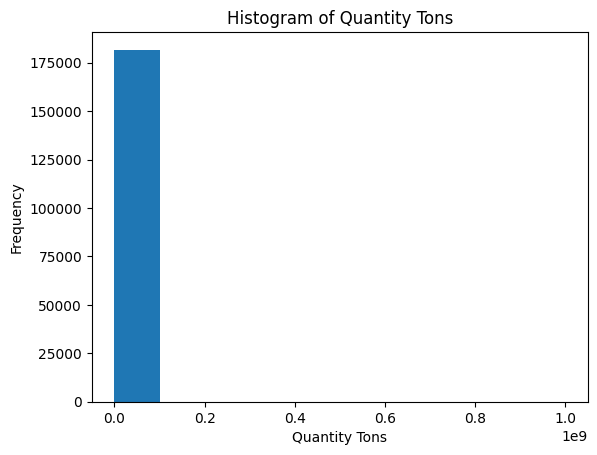

In [158]:
import matplotlib.pyplot as plt

plt.hist(df['Quantity_Tons'], bins=10)
plt.title('Histogram of Quantity Tons')
plt.xlabel('Quantity Tons')
plt.ylabel('Frequency')
plt.show()

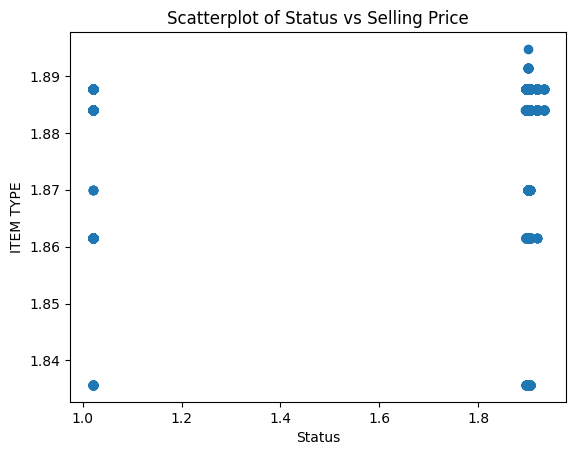

In [312]:
import matplotlib.pyplot as plt

plt.scatter(x=df['Status'], y=df['Item_Type'])
plt.title('Scatterplot of Status vs Selling Price')
plt.xlabel('Status')
plt.ylabel('ITEM TYPE')
plt.show()

[Text(0, 0, 'Draft'),
 Text(1, 0, 'Lost'),
 Text(2, 0, 'Not lost for AM'),
 Text(3, 0, 'Offerable'),
 Text(4, 0, 'Offered'),
 Text(5, 0, 'Revised'),
 Text(6, 0, 'To be approved'),
 Text(7, 0, 'Won'),
 Text(8, 0, 'Wonderful')]

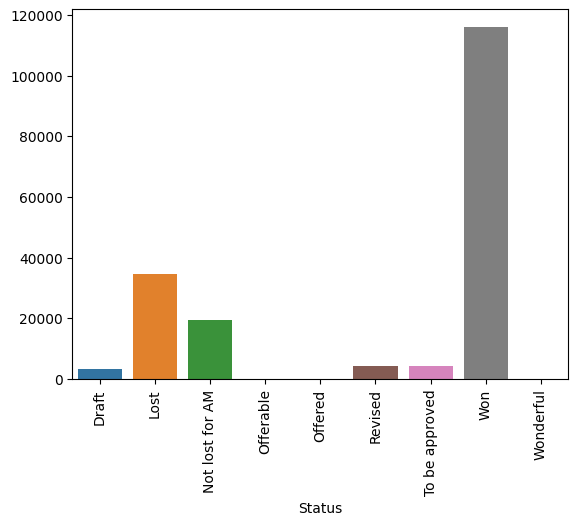

In [305]:
# BARPLOT OF STATUS WITH THEIR COUNT
fig, ax = plt.subplots()
grouped_status = data.groupby(['Status'])['Status'].count()

sns.barplot(x=grouped_status.index, y=grouped_status.values, data=data, ax=ax)
ax.set_xticklabels(labels=grouped_status.index, rotation=90)

## BEFORE APPLING LOG TRANSFORM ON TARGET


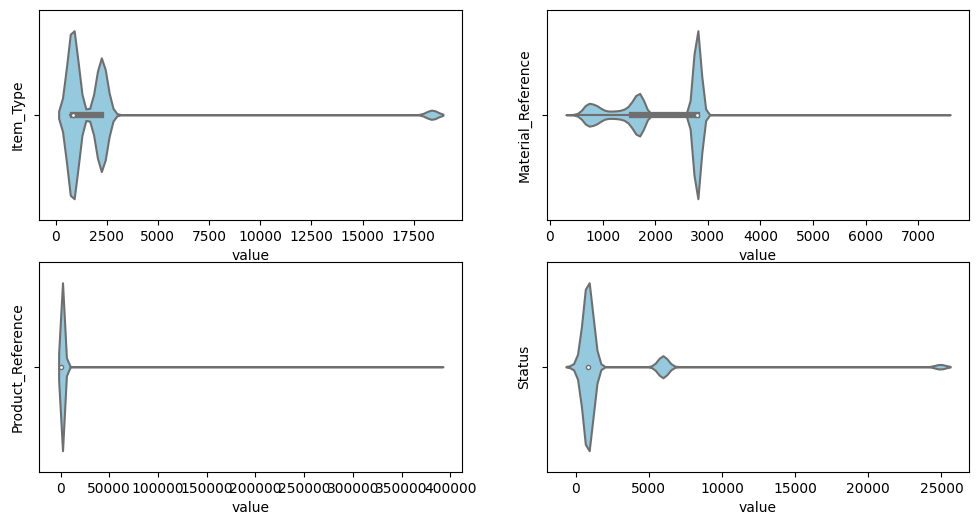

Text(0.5, 0.98, 'VIOLIN PLOT CATEGORICAL VARIABLE')

<Figure size 640x480 with 0 Axes>

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for the violin plot
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax=ax.ravel()
for i, feature in enumerate(cols1):
    sns.violinplot(data=df1, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.2)
plt.show()
plt.suptitle("VIOLIN PLOT CATEGORICAL VARIABLE")

## AFTER APPLING LOG TRANSFORM ON TARGET


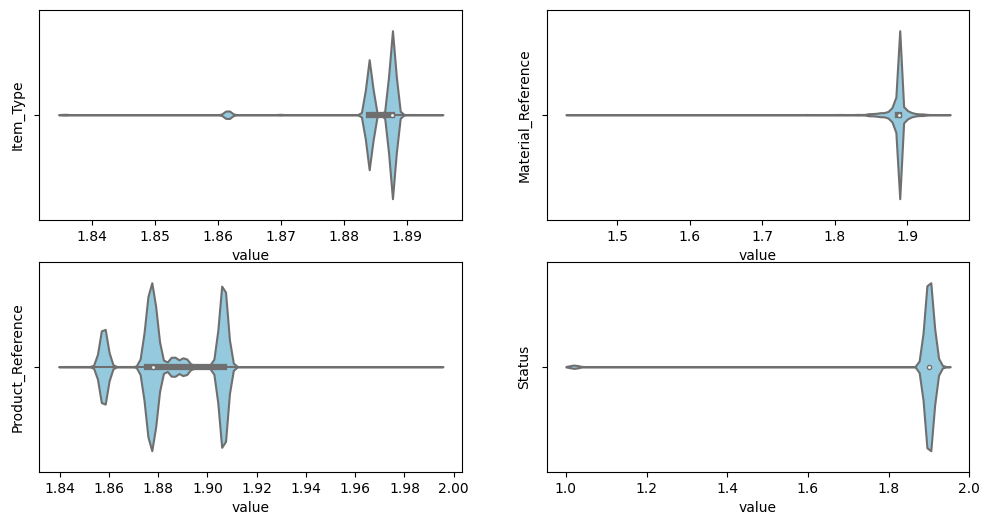

Text(0.5, 0.98, 'VIOLIN PLOT CATEGORICAL VARIABLE')

<Figure size 640x480 with 0 Axes>

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for the violin plot
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax=ax.ravel()
for i, feature in enumerate(cols1):
    sns.violinplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.2)
plt.show()
plt.suptitle("VIOLIN PLOT CATEGORICAL VARIABLE")


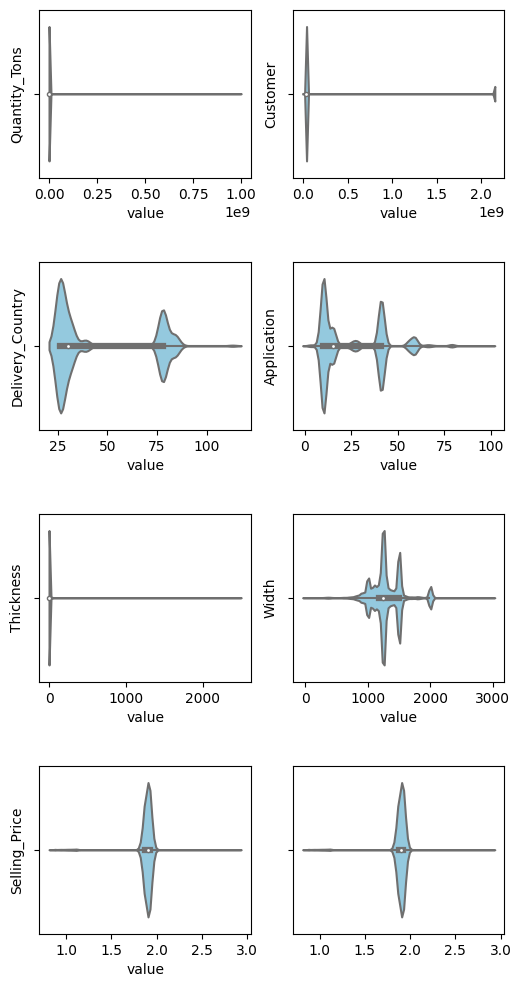

Text(0.5, 0.98, 'VIOLIN PLOT CONTINUOUS VARIABLE')

<Figure size 640x480 with 0 Axes>

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for the violin plot
fig, ax = plt.subplots((len(cols2)+1)//2, 2, figsize=(6, 12))
ax=ax.ravel()
for i, feature in enumerate(cols2):
    sns.violinplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)
sns.violinplot(data=df, x=y, ax=ax[-1], color='skyblue')
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.suptitle("VIOLIN PLOT CONTINUOUS VARIABLE")


distplot is a function in the seaborn library that is used to visualize the distribution of a univariate set of observations. It basically plots a histogram and fits a kernel density estimate (KDE) to the data, providing a smooth estimate of the distribution.

KDE works by using a kernel function to approximate the probability density of a random variable. The kernel function is centered at each data point in the sample, and the kernel functions are summed together to form a smooth curve that approximates the density of the data.

f
​
  h
​
 (x)= 
1/n
∑
​
 K 
h
​
 (x−x 
i
​
 )

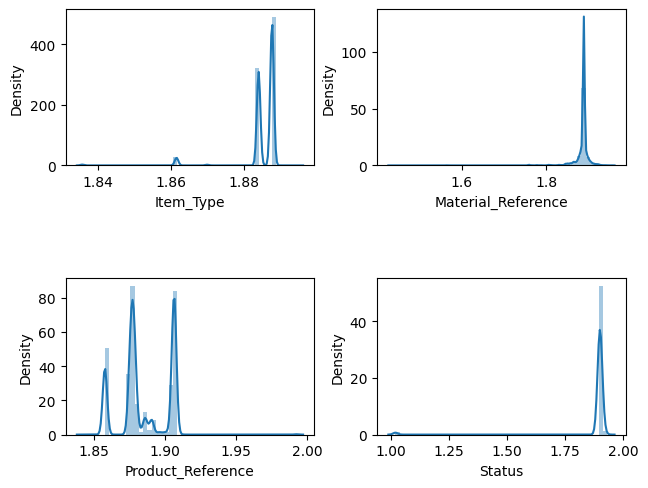

In [220]:
#Distribution plot
fig, axs = plt.subplots(nrows=2, ncols=2)
axes = axs.flatten()
index=0
for i, j in df[cols1].items():
    sns.distplot(j, ax= axes[index])
    index+=1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Box-Cox transformation is a technique used to transform non-normal distributed data to a normal distribution
This transformation is based on a power function and transforms the data 
BEST USECASE:   highly skewed variables or variables with extreme values. [QCUTS FAILS]
main advantage of Box-Cox transformation is that it can improve the performance of linear regression models and other machine learning algorithms that assume a normal distribution of the input variables.

THERE ARE OTHER TRANSFORMATION like  Winsorization which  being used for imputing non-extreme values and treating outliers in the skewed column, it is important to note that Winsorization typically replaces extreme values with values that are less extreme but still within the range of the original data

what is QCUT:
The qcut function is useful for converting continuous variables into categorical variables by creating bins based on the distribution of the data, rather than using fixed-width bins. The resulting bins have approximately the same number of observations in each bin. useful when  the relationship between the variables is nonlinear.

The transformation is parameterized by a lambda value that determines the type of transformation to be applied. When lambda is equal to 0, a log transformation is applied; when lambda is equal to 1, no transformation is applied; and when lambda is not equal to 0 or 1, a power transformation is applied.
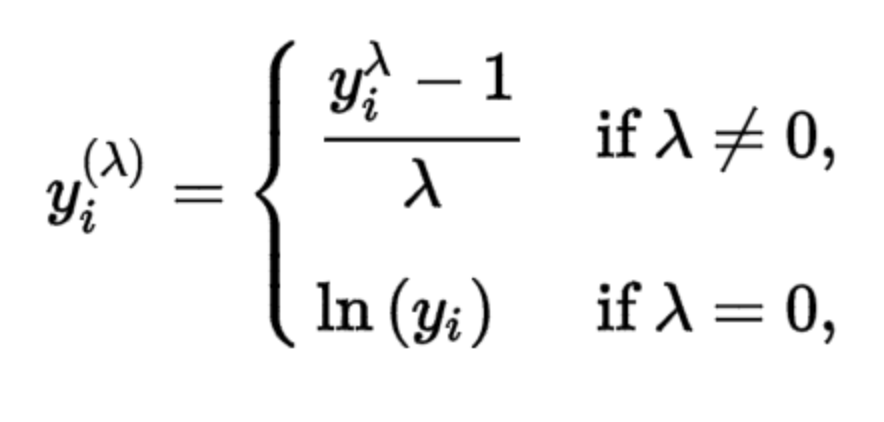

In [3]:
from scipy import stats

# Assume x is a right-skewed continuous variable
transformed_x1, lam = stats.boxcox(df['Thickness'])

# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['Thickness'], ax=ax[0])
sns.histplot(transformed_x1, ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed THICKNESS (lambda={:.2f})".format(lam))
plt.show()

# FEATURE ENGINEERING

This is useful information because it can help us understand how quickly items are being delivered to customers.

In [330]:
#ANALYTICALLY DELIVERY TIME COULD IMPACT TRAINING REGRESSION

df['Item_Date'] = pd.to_datetime(df['Item_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])
df['Delivery_Time'] = (df['Delivery_Date'] - df['Item_Date']).dt.total_seconds() # CALCULATING DIFFERENCES IN SECONDS

In [331]:
#ASPECT RATIO OF COPPER AND TOTAL AMOUNT IN CURRENCY

df['Aspect_Ratio'] = df['Width'] / df['Thickness']
df['Total_Amount'] = df['Quantity_Tons'] * df['Selling_Price']

 If the aspect_ratio is greater than 1, it means that the item is wider than it is thick, and if it is less than 1, it means that it is thicker than it is wide.
 
 This gives us the total amount of money earned by selling each steel item.

In [332]:
#DROPPING IRRELEVANT FEATURES

df.drop(['Item_Date', 'Delivery_Date'], axis=1, inplace=True)

In [335]:
df.isnull().sum()

Quantity_Tons         0
Customer              0
Delivery_Country      0
Status                0
Item_Type             0
Application           0
Thickness             0
Width                 0
Material_Reference    0
Product_Reference     0
Selling_Price         0
Delivery_Time         0
Aspect_Ratio          0
Total_Amount          0
dtype: int64

In [334]:
df['Aspect_Ratio'].fillna(df['Aspect_Ratio'].mean(), inplace=True)

# EDA-2

highly correlated features can cause multicollinearity issues, which can affect the performance of the model. Multicollinearity occurs when two or more independent variables are highly correlated, which makes it difficult for the model to determine the individual effect of each variable on the target variable.

<AxesSubplot: >

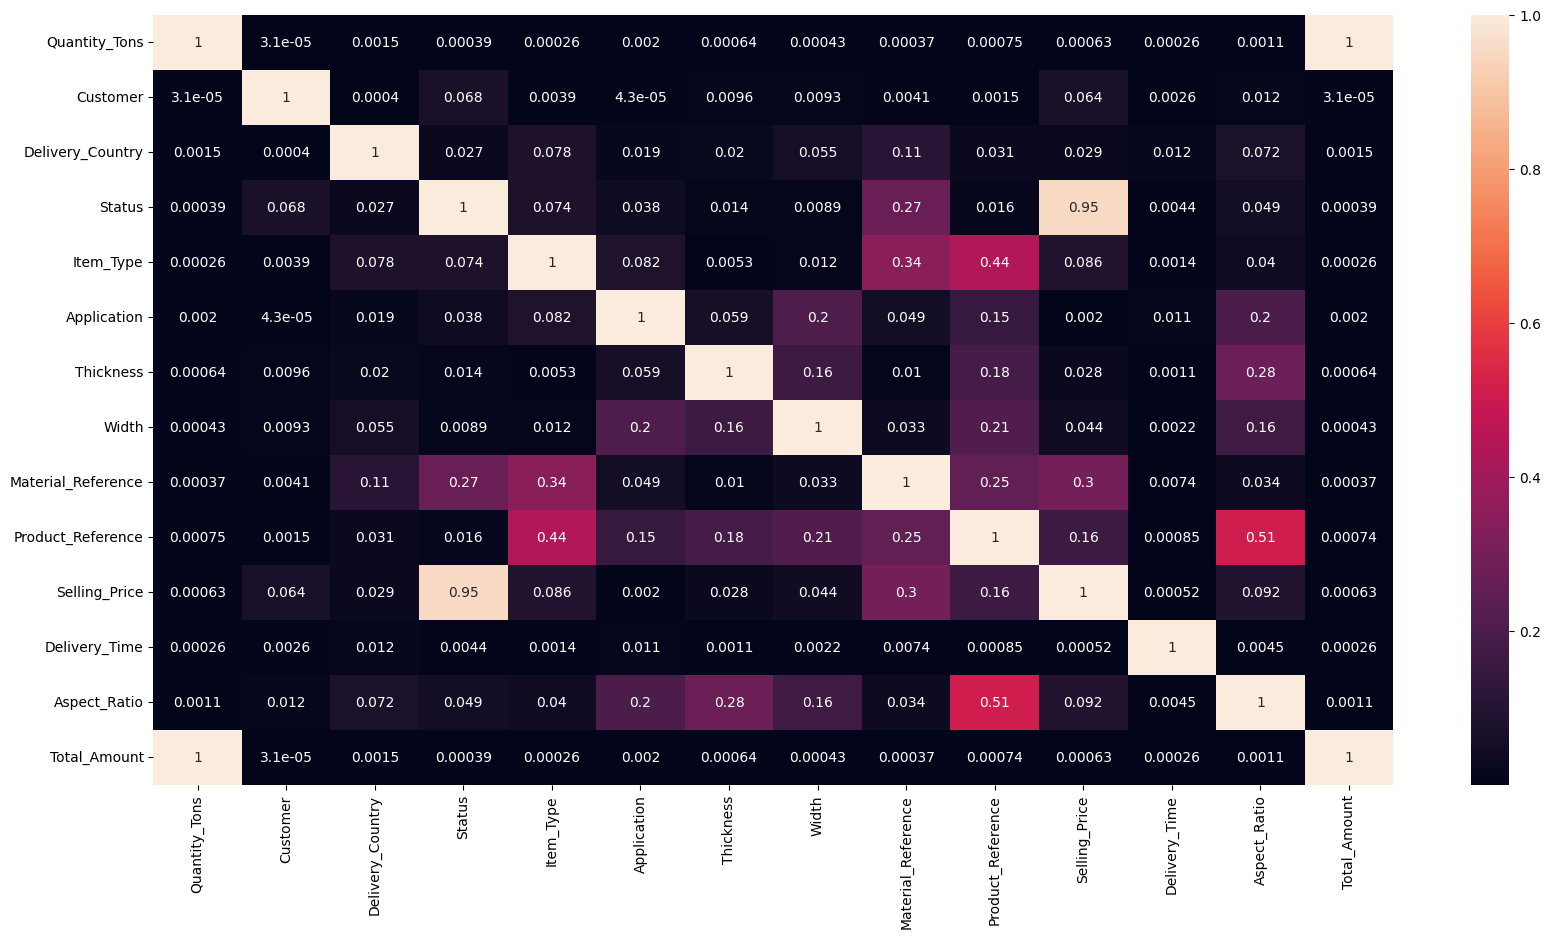

In [338]:
#HEATMAP FOR CORRELATION BETWEEN VARIABLES

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

The purpose of this code is to visualize the distribution of categorical variables in the dataset. By using a countplot, we can quickly see the number of occurrences of each category in a given variable. This can be helpful in understanding the balance of classes in the dataset

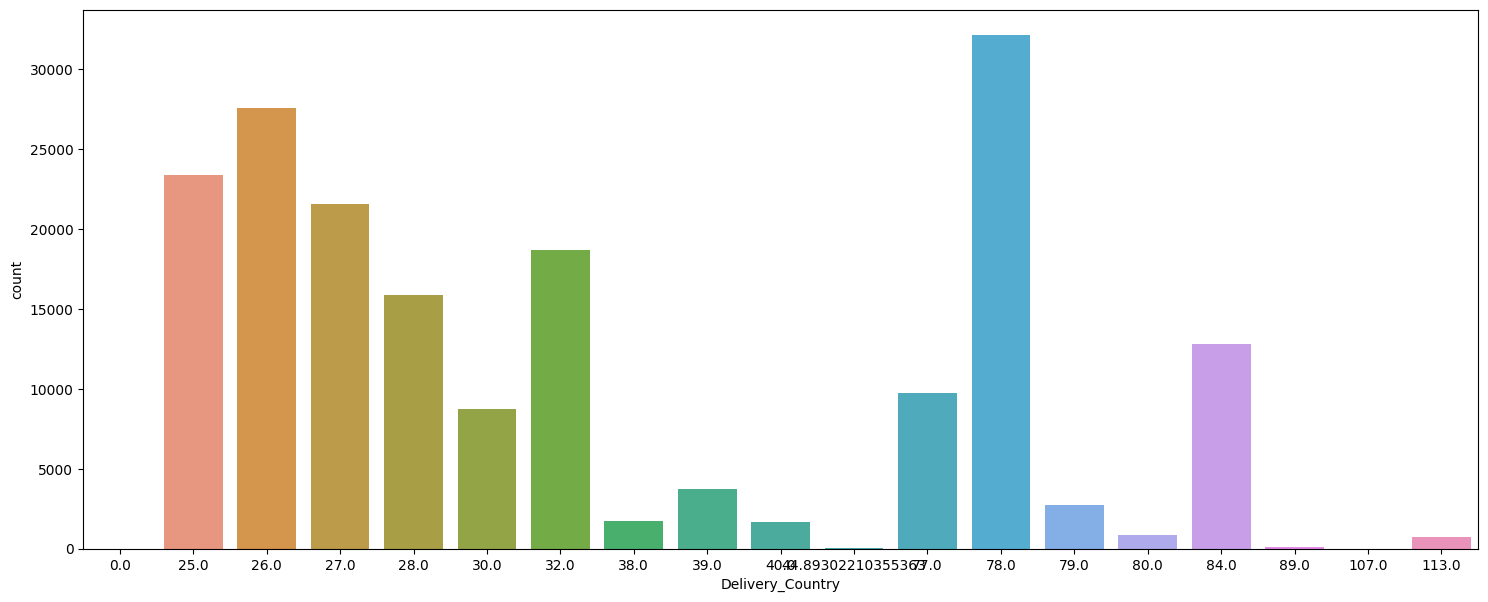

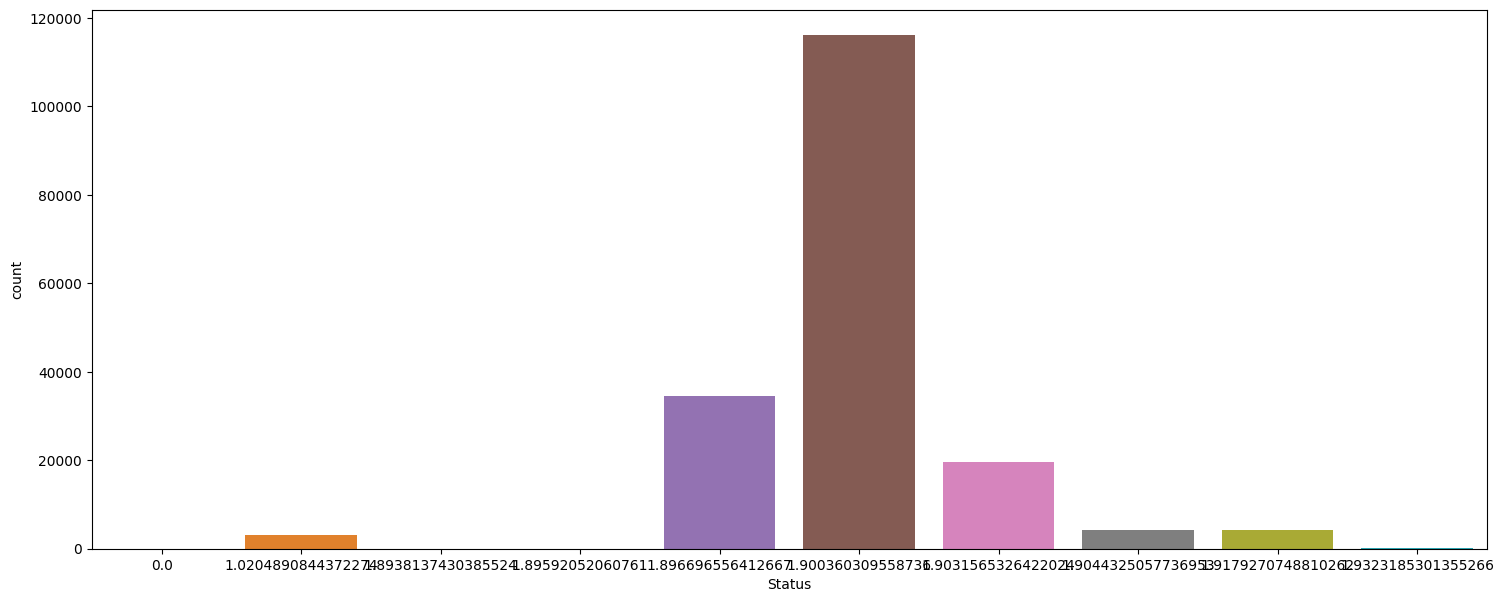

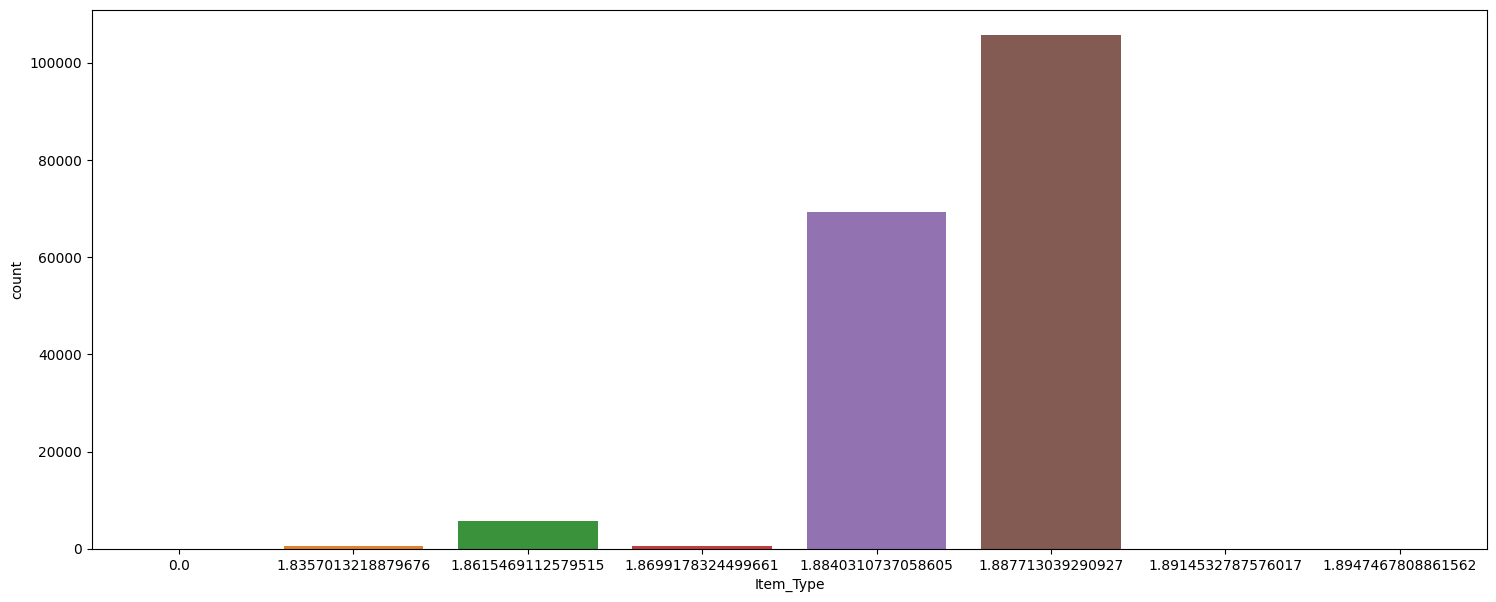

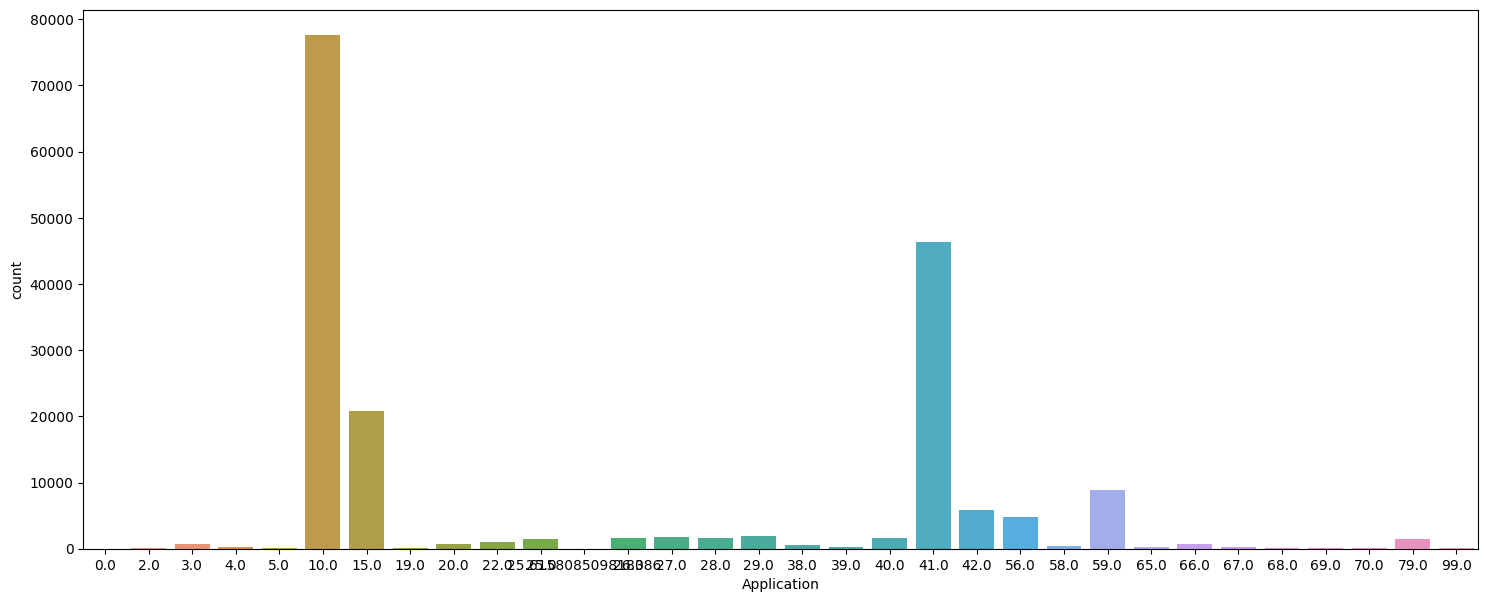

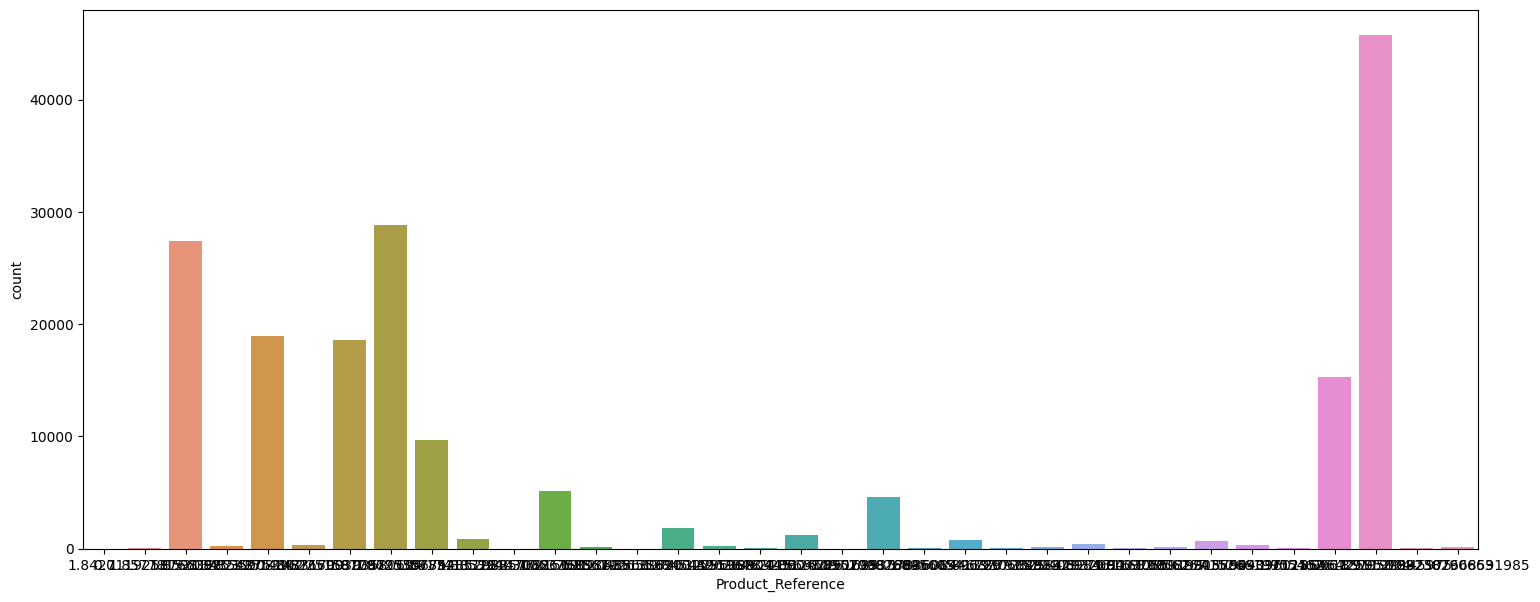

In [342]:
for i in df.columns:
    if(df[i].nunique()<35):
        plt.figure(figsize=(18, 7))
        sns.countplot(x=df[i])
        plt.show()

In [339]:
df.columns

Index(['Quantity_Tons', 'Customer', 'Delivery_Country', 'Status', 'Item_Type',
       'Application', 'Thickness', 'Width', 'Material_Reference',
       'Product_Reference', 'Selling_Price', 'Delivery_Time', 'Aspect_Ratio',
       'Total_Amount'],
      dtype='object')

### OUTLIER DETECTION

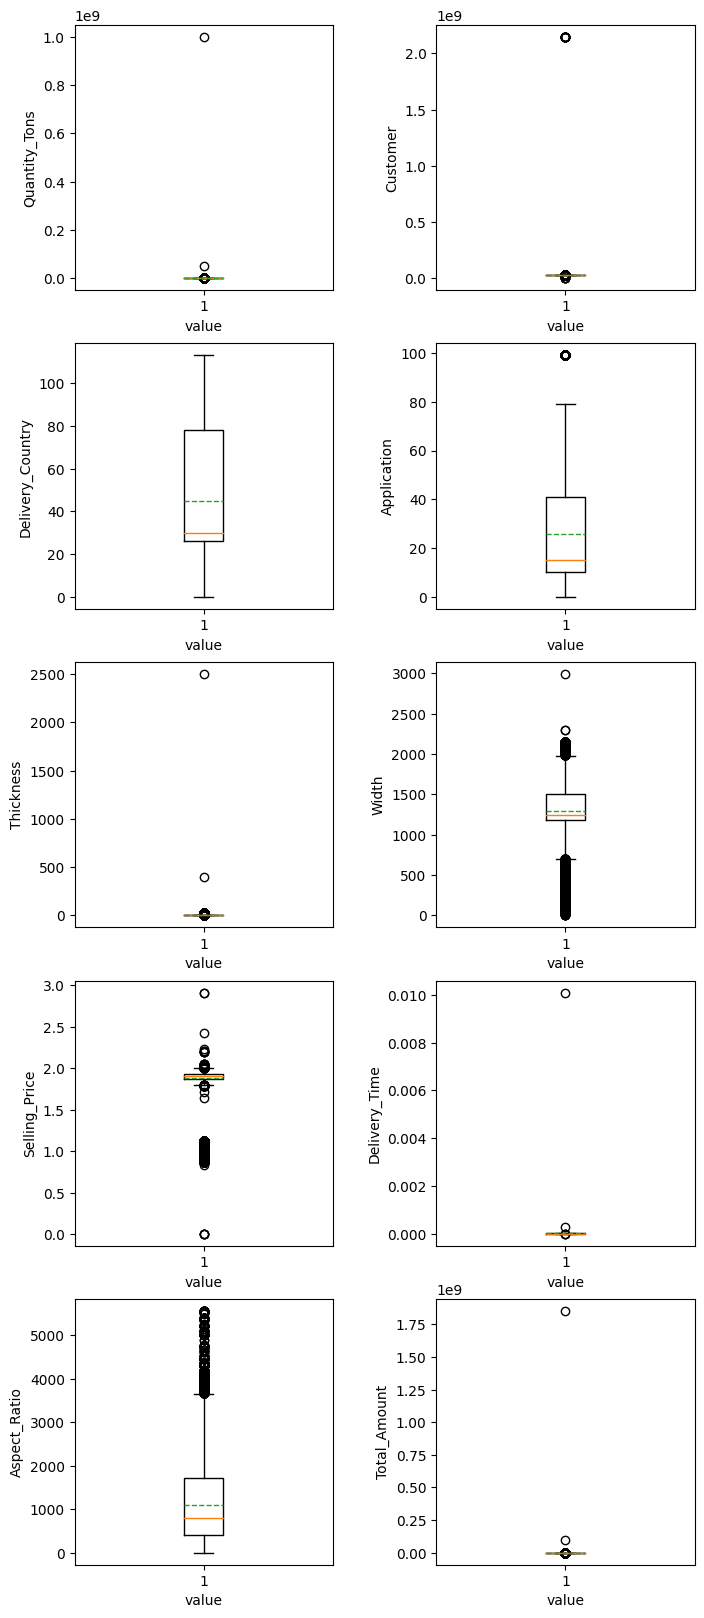

Text(0.5, 0.98, 'BOX PLOT CATEGORICAL VARIABLE')

<Figure size 640x480 with 0 Axes>

In [340]:
#cols4 is all EDA PURPOSE continuous var

cols4= cols2 + ['Delivery_Time', 'Aspect_Ratio','Total_Amount']
fig, ax = plt.subplots((len(cols4)+1)//2, 2, figsize=(8, 20))
ax=ax.ravel()
#df['Selling_Price']=y
for i, feature in enumerate(cols4):
    ax[i].boxplot(df[feature], showmeans = True, meanline = True)
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)
plt.show()
plt.suptitle("BOX PLOT CATEGORICAL VARIABLE")


In [348]:
cols1,cols2,cols3,cols4

(['Item_Type', 'Material_Reference', 'Product_Reference', 'Status'],
 ['Quantity_Tons',
  'Customer',
  'Delivery_Country',
  'Application',
  'Thickness',
  'Width',
  'Selling_Price'],
 [Index(['Selling_Price'], dtype='object')],
 ['Quantity_Tons',
  'Customer',
  'Delivery_Country',
  'Application',
  'Thickness',
  'Width',
  'Selling_Price',
  'Delivery_Time',
  'Aspect_Ratio',
  'Total_Amount'])

Isolation Forest is an unsupervised learning algorithm for anomaly detection, which means that it identifies observations that are significantly different from the rest of the data. The algorithm works by building an ensemble of isolation trees. An isolation tree is a binary tree that recursively splits the data into two parts until each part contains only one observation. The split is based on selecting a random feature and a random value within the range of that feature. The algorithm creates a tree by repeating this process until a specified depth is reached or the data is completely isolated.
This is because the anomaly is expected to be isolated more quickly and easily than normal data points. Thus, the average path length for a given data point across all decision trees in the forest is used as the anomaly score.

Local Outlier Factor (LOF) is an unsupervised machine learning algorithm used for outlier detection. The algorithm assigns an outlier score to each data point based on its local density, relative to the densities of its neighbors. The outlier score is calculated as the ratio of the average local density of the data point's k-nearest neighbors and its own local density. If the outlier score is close to 1, it means the data point is in a dense area and is not an outlier. If the outlier score is significantly less than 1, it means the data point is in a sparse area and is an outlier.

In [399]:
#cols5 for EDA2
cols5= cols1+cols4
y = df['Selling_Price']
X = df[cols5]
# Fit the Isolation Forest model to the data
clf = IsolationForest(random_state=0, n_estimators=100, contamination=0.1)
clf.fit(df)

# Predict the outlier status of each sample
outlier_labels = clf.predict(df)

# Remove the outlier samples from the data
X_clean = X[outlier_labels == 1]
y_clean = y[outlier_labels == 1]

X_clean.shape

(163505, 14)

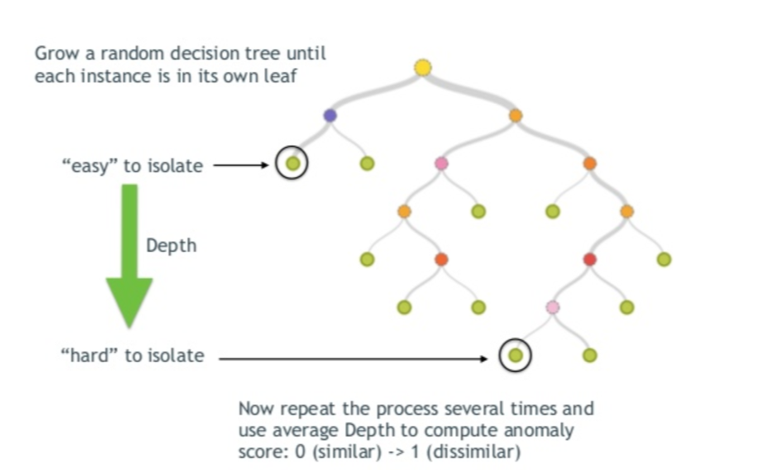

In [406]:
from sklearn.neighbors import LocalOutlierFactor

# create LOF object
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.5)

# fit on data
lof.fit(X_clean)

# get outlier scores
outlier_scores = lof.negative_outlier_factor_

# create mask of non-outliers
outlier_mask = outlier_scores > -2.5

# get non-outliers
X_clean1 = X_clean[outlier_mask]
y_clean1 = y_clean[outlier_mask]

In [407]:
print(df.shape)
print(X_clean.shape)
X_clean1.shape

(181673, 14)
(163505, 14)


(153965, 14)

In [353]:
from scipy.stats import boxcox

# Apply the Box-Cox transformation to the right-skewed X 

X_clean[X_clean['Quantity_Tons']/abs(X_clean['Quantity_Tons'])==-1]= X_clean.mean()# only positives
X_clean['Quantity_Tons'], _ = boxcox(X_clean['Quantity_Tons'])


MemoryError: Unable to allocate 7.51 GiB for an array with shape (2, 503973481) and data type float64

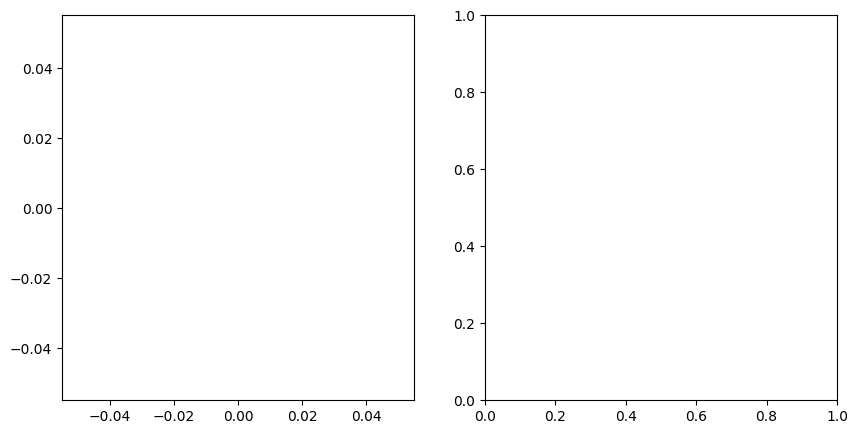

In [355]:
from scipy import stats

# Assume x is a right-skewed continuous variable
transformed_x2=X_clean['Quantity_Tons']

# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['Quantity_Tons'], ax=ax[0])
sns.histplot(transformed_x2, ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed QUANTITY_TONS (lambda={:.2f})".format(lam))
plt.show()

<AxesSubplot: >

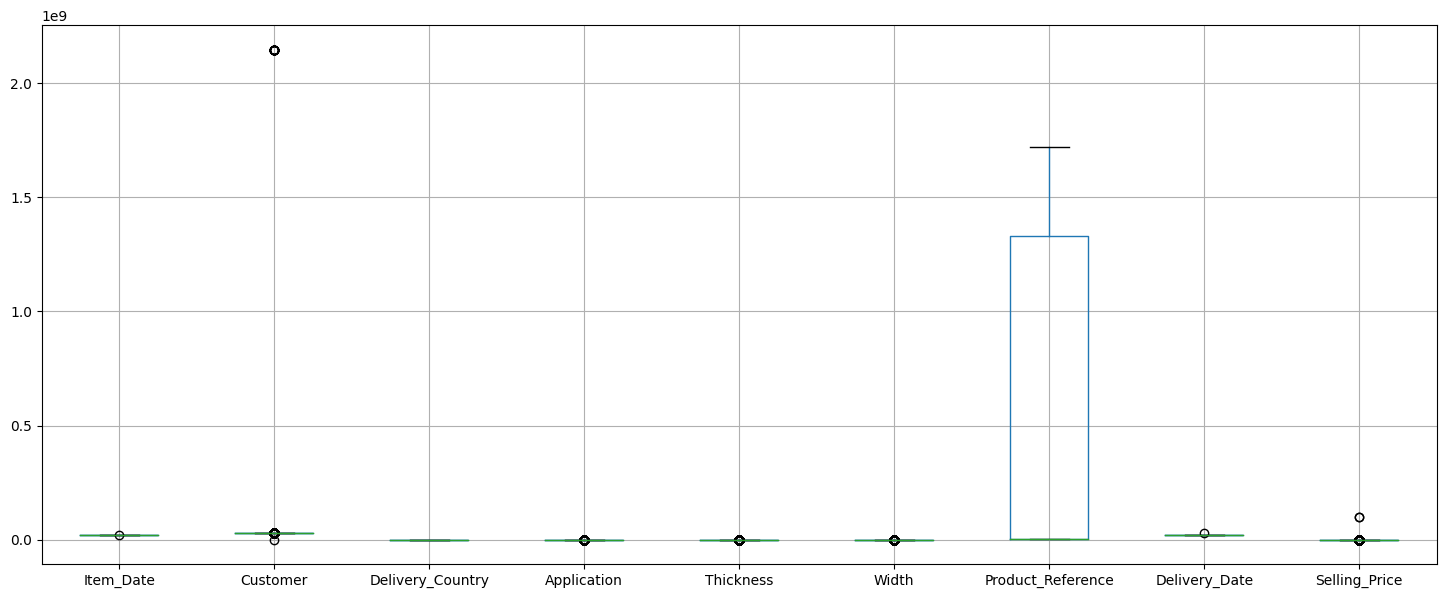

In [357]:
#before treating outliers
data.boxplot(figsize=(18, 7))

[Text(1, 0, 'Item_Type'),
 Text(2, 0, 'Material_Reference'),
 Text(3, 0, 'Product_Reference'),
 Text(4, 0, 'Status'),
 Text(5, 0, 'Quantity_Tons'),
 Text(6, 0, 'Customer'),
 Text(7, 0, 'Delivery_Country'),
 Text(8, 0, 'Application'),
 Text(9, 0, 'Thickness'),
 Text(10, 0, 'Width'),
 Text(11, 0, 'Selling_Price'),
 Text(12, 0, 'Delivery_Time'),
 Text(13, 0, 'Aspect_Ratio'),
 Text(14, 0, 'Total_Amount')]

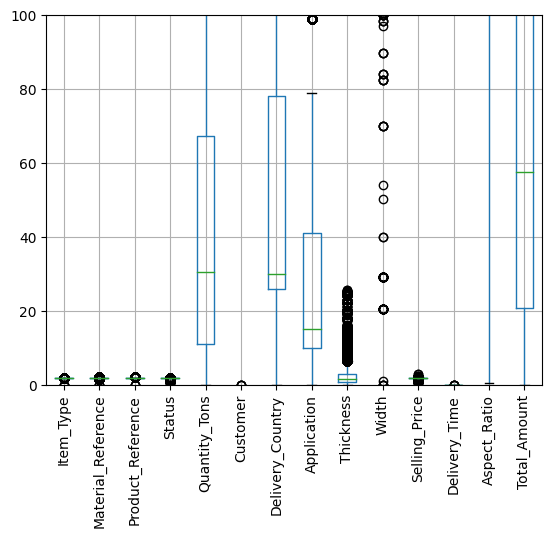

In [358]:
#after treating outlier
fig, ax = plt.subplots()
X_clean[cols5].boxplot(figsize=(16, 9), ax=ax)

ax.set_ylim(bottom=0, top=100)
ax.set_xlim(auto=True)
ax.set_xticklabels(cols5, rotation=90)

FINDINGS:
    0) regplot and box plot on thickness vs. selling price says strong outlier in selling price
    1) Status = WON has most occurence and makes distribution right skew
    2) Material ref is right skewed
    3) Width of steel has its box whisker near 1500 value
    4) right skewed thickness is evenly distributed with box-cox
    5) target variable is much right skew/ positive skew so transformation or oversampling of data requires
    6) when target variable not transformed or treated, only decision trees variants and ensemble models performs better as they are good in dealing positive skews

# DATA BATCH PROCESSING

In [359]:
X_clean['y']= y_clean

In [361]:
#cols6 for training
cols6= ['Item_Type',
 'Material_Reference',
 'Product_Reference',
 'Status',
 'Quantity_Tons',
 'Customer',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']
cols6

['Item_Type',
 'Material_Reference',
 'Product_Reference',
 'Status',
 'Quantity_Tons',
 'Customer',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']

The StandardScaler scales the feature values to have zero mean and unit variance. It subtracts the mean of the feature values from each observation and then divides it by the standard deviation of the feature values. This ensures that the mean of the feature values becomes zero and the standard deviation becomes 1. The resulting feature values will be centered around zero and will have a variance of 1. 
DOESNOT MEAN 0-1 OR -1TO1 (MINMAX USED FOR 0-1)

In [362]:
#scaling continuous feature values = removing mean and standard deviation

scaler = StandardScaler()
for i in cols6:
    X_clean[i] = scaler.fit_transform(np.array(X_clean[i]).reshape(-1,1))

In [364]:
X_clean[cols6]

,Item_Type,Material_Reference,Product_Reference,Status,Quantity_Tons,Customer,Delivery_Country,Application,Delivery_Time,Aspect_Ratio,Total_Amount
0,0.484975,0.271590,-0.605175,-0.026749,0.498021,-0.012532,-0.684530,-0.866989,-0.096994,-0.433248,-0.032982
1,0.484975,0.126357,1.149647,-0.026749,2.982404,-0.007324,-0.808429,0.923149,-0.109004,0.482584,7.949572
3,-0.424091,0.250947,1.149647,-0.026749,1.654563,0.009053,-0.519331,1.962585,-0.121015,-0.646311,1.579067
5,0.484975,0.126357,1.149647,-0.026749,1.757149,-0.007324,-0.808429,0.923149,-0.109004,-0.321146,1.881491
7,0.484975,0.126357,1.223290,-0.026749,1.128261,0.008228,-0.519331,0.923149,-0.121015,0.820832,0.626780
...,...,...,...,...,...,...,...,...,...,...,...
181667,0.484975,0.126357,-0.453413,-0.026749,1.075410,-0.007557,-0.808429,0.923149,-0.109044,0.217343,0.513139
181668,0.484975,0.126357,-0.453413,-0.026749,1.039377,-0.007557,-0.808429,0.923149,-0.109044,0.192320,0.465453
181669,0.484975,0.126357,-0.453413,-0.026749,1.680414,-0.007557,-0.808429,0.923149,-0.109044,0.562393,1.592115
181670,0.484975,0.126357,-0.453413,-0.026749,-1.363278,-0.007557,-0.808429,0.923149,-0.109044,0.780530,-0.583132


In [366]:
# Split dataset into X (features) and y (target variable)
X = X_clean[cols6]
y = X_clean['y']
print(f"before transformation skewness of y = {data['Selling_Price'].skew()}" )
    
#applying log transformation to target variable to reduce skewness
## since applied log transform in outlier detection 

# Split X and y into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=53)

print(f"after transformation skewness of y = {y.skew()}")

before transformation skewness of y = 301.38725841152456
after transformation skewness of y = -0.013097282937116669


In [367]:

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) 
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)  




Lasso: short for Least Absolute Shrinkage and Selection Operator, is a linear regression method that adds a penalty term to the loss function to promote sparsity in the model coefficients. This means it encourages the coefficients of some features to be exactly zero, effectively performing feature selection and eliminating less important variables from the model.

Ridge regression is a linear regression technique that adds a regularization term to the loss function in order to prevent overfitting. The regularization term adds a penalty to the model coefficients, which encourages the model to select coefficients that are smaller in magnitude, thereby reducing the complexity of the model

Elastic Net is a regularization method that combines both L1 (Lasso) and L2 (Ridge) penalties to overcome their limitations.. The L1 penalty promotes sparsity in the coefficients, while the L2 penalty helps prevent overfitting.  it is perfect balance.

The Decision Tree Regressor is a type of regression algorithm that uses a decision tree to predict the target variable. The decision tree is a tree-like structure that represents a series of decisions and their possible consequences. At each node of the tree, a decision is made based on one of the features in the dataset. The decision tree continues to split until a stopping criterion is met, such as reaching a maximum depth or minimum number of samples required to split.

ExtraTreesRegressor is a type of ensemble learning model used in regression problems. It is a variant of the Random Forest algorithm, where multiple decision trees are built and their results are combined to make a final prediction.
In ExtraTreesRegressor, instead of building individual decision trees using a bootstrap sample of the data, a random subset of the features is considered at each split in each tree. This makes the model more robust to noisy or irrelevant features and can result in better performance compared to Random Forest in certain cases.

Decision Trees use a greedy approach where the algorithm selects the best split point at each node to partition the data into subsets. In contrast, Extra Trees use randomization to create an ensemble of decision trees, where each tree is trained on a randomly selected subset of features and a random subset of the training data.

The randomness of Extra Trees makes them less prone to overfitting, which is a common problem with Decision Trees. 

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. The intuition behind XGBoost(train predictor sequentially) is to iteratively build an ensemble of weak decision trees, where each tree is trained to predict the residual errors of the previous tree. The final prediction is the sum of the predictions from all the trees in the ensemble. its child should have same feature unlike EXTRA TREE

feature importance by computing the avg depth which it appears across all tress in forest, imp = near to root.

In [368]:
#REGRESSION MODELS
seed = 53

linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features=None)
svm = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, 
    epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
et = ExtraTreesRegressor(
    n_estimators=100, 
    criterion='mse', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    random_state=seed, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=False, 
    oob_score=False, 
    n_jobs=None, 
    verbose=0, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1, random_state = seed, n_jobs = -1)


In [369]:
# using cross validation 

def cross_validate(model):
    neg_score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')
    score = np.round(np.sqrt(-1*neg_score), 5)
    return score.mean()

models = [linear, lasso, ridge, elnt, dt, et, xgb]
models_n = ['linear', 'lasso', 'ridge', 'elnt', 'dt', 'et', 'xgb']
training_score = []
rmse_score = []
test_score = []
c=0
for model in models:
    scr=cross_validate(model)
    c+=1
    y_true = y_test# true target values for the test set
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)# predicted target values for the test set
    
    # Calculate R2 score tscr on tests
    tr2 = model.score(X_train, y_train)
    tscr = model.score(X_test, y_test) # or  r2 = r2_score(y_true, y_pred)


    
    training_score.append(tr2)
    rmse_score.append(scr)
    test_score.append(tscr)
    
    importances= []
    print(c, model, "RMSE_score:", scr,"\t", "Train_r2_score:", tr2,"\t", "Test_R2_score:", tscr,  "\n")

    if model in [ dt, et, xgb]:
        importances = model.feature_importances_
        model.feature_names = X.columns

        for i,v in zip(model.feature_names, importances):
            print('Feature: %s, Score: %.5f' % (i,v))
        print("\n")

        
# trainscore in df
train_score = pd.DataFrame({'Training_R2': training_score, 'rmse_score': rmse_score, 'test_score': test_score})
train_score.index = ['LR', 'LSO', 'RIDGE', 'ELNT', 'DT', 'ET', 'XGB']
train_score['rmse_score'] = (train_score['rmse_score']*100).round(4)
scatter_plot(train_score.index, train_score['rmse_score'], 'Training Score (RMSE)', 'Models','% Training Score', 30, 'Rainbow')



1 LinearRegression(n_jobs=-1) RMSE_score: 0.033454 	 Train_r2_score: 0.3618652986020018 	 Test_R2_score: 0.3668356692001764 

2 Lasso(random_state=53) RMSE_score: 0.035634 	 Train_r2_score: 0.0 	 Test_R2_score: -7.379355102332674e-05 

3 Ridge(random_state=53) RMSE_score: 0.033451999999999996 	 Train_r2_score: 0.3618652985946369 	 Test_R2_score: 0.36683564053139606 

4 ElasticNet(random_state=53) RMSE_score: 0.035634 	 Train_r2_score: 0.0 	 Test_R2_score: -7.379355102332674e-05 

5 DecisionTreeRegressor(random_state=53) RMSE_score: 0.013104 	 Train_r2_score: 1.0 	 Test_R2_score: 0.8849812846925008 

Feature: Item_Type, Score: 0.01447
Feature: Material_Reference, Score: 0.06084
Feature: Product_Reference, Score: 0.36298
Feature: Status, Score: 0.02199
Feature: Quantity_Tons, Score: 0.01881
Feature: Customer, Score: 0.05697
Feature: Delivery_Country, Score: 0.07268
Feature: Application, Score: 0.01939
Feature: Delivery_Time, Score: 0.31563
Feature: Aspect_Ratio, Score: 0.03726
Feature: T

In [371]:
train_score['test_score']= train_score['test_score'].apply(lambda x : round(x,3))
train_score.sort_values(by='test_score')

,Training_R2,rmse_score,test_score
LSO,0.000000,3.5634,-0.000
ELNT,0.000000,3.5634,-0.000
LR,0.361865,3.3454,0.367
RIDGE,0.361865,3.3452,0.367
XGB,0.814949,1.5812,0.810
DT,1.000000,1.3104,0.885
ET,1.000000,0.9988,0.938


In [372]:
model = xgb
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=53, ...)

[learning_curve] Training set sizes: [ 13420  26841  40262  53683  67104  80524  93945 107366 120787 134208]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.8s finished


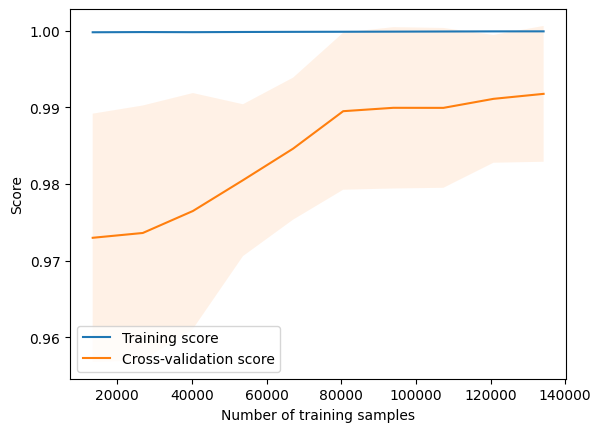

In [373]:
#LEARNING CURVE FOR XGB REGRESSOR

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(model, X_clean, y_clean, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

# mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [409]:
def grid_search_cv(model, params,cv=10):
    global best_params, best_score
    
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv=cv , verbose = 1,
                            scoring = 'r2', n_jobs = -1)
    grid_search.fit(X_clean1[cols7], y_clean1)
    best_params = grid_search.best_params_ 
    best_score = grid_search.best_score_#np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

Singular Value Decomposition (SVD) can be used in optimization problems to perform dimensionality reduction on high-dimensional datasets. By reducing the dimensionality of the data, the optimization problem can be simplified, leading to faster computation times and potentially better results.

LSQR (Least Squares QR factorization) is an iterative algorithm used to solve linear systems of the form Ax = b or find the minimum norm solution to an underdetermined system. It is often used when A is a large, sparse matrix.
LSQR works by computing the QR factorization of A, and then using this factorization to solve the system. The algorithm starts with an initial estimate of the solution, and then iteratively improves the estimate until it converges to the true soluti

SAGA (Stochastic Average Gradient Descent with Averaging) is a type of optimization algorithm that can be used for solving large-scale linear and logistic regression problems. It is an extension of the popular stochastic gradient descent (SGD) algorithm that improves the convergence rate by incorporating a momentum term.
w_new = w_old - alpha * (gradient + (1/m) * np.sum(grads_buffer, axis=0) - (1/m) * grads_buffer[i,:] )

where:

w_new is the new value of the parameter vector
w_old is the old value of the parameter vector
alpha is the learning rate
gradient is the gradient of the objective function with respect to the current sample
grads_buffer is the buffer that stores the gradient information for each sample
m is the total number of samples in the dataset
i is the index of the current sample

The grads_buffer term in the formula represents the previous gradients, and (1/m) * np.sum(grads_buffer, axis=0) calculates the average gradient across all previous iterations.

In [414]:
# hyperparameters tuning of ridge

ridge_params = {'alpha': [0.01, 0.1, 1],
              'normalize': [True, False],
              'max_iter': [100, 500, 1000],
              'solver': ['auto'],#, 'svd', 'lsqr', 'saga'],
              'tol': [0.001, 0.01, 0.1],
              'fit_intercept': [True, False],
              'random_state': [0]}
model = linear
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}
best_params, best_score = grid_search_cv(linear, param_grid)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Ridge best params:{'fit_intercept': True, 'normalize': False} & best_score:-0.14736


In [387]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2

# selector instance with f_classif scoring function 
selector = SelectPercentile(f_classif, percentile=90)

selector.fit(X_clean[cols6], y_clean)

selected_features = selector.get_support()

X_selected = np.array(X_clean[cols6])[:, selected_features]
X_clean[cols6].columns[selected_features] #CUSTOMER, DELIVER_TIME REMOVED/ LEAST INFLUENCING VARS 

Index(['Item_Type', 'Material_Reference', 'Product_Reference', 'Status',
       'Quantity_Tons', 'Delivery_Country', 'Application', 'Aspect_Ratio',
       'Total_Amount'],
      dtype='object')

In [385]:
cols6

['Item_Type',
 'Material_Reference',
 'Product_Reference',
 'Status',
 'Quantity_Tons',
 'Customer',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']

In [408]:
cols7=['Item_Type',
 'Status',
 'Quantity_Tons',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']

# REG TO CLASS:
1)In regression, the dependent variable is a continuous variable, while in classification, the dependent variable is categorical. Log transformation may not be suitable for categorical variables because they do not have a continuous nature.
   -the purpose of log transformation in regression is to address the issue of heteroscedasticity, which is when the variance of errors is not constant across the range of predicted values. By taking the logarithm of the dependent variable, the magnitude of larger values is reduced, which can help to reduce the difference in variances across the range of predicted values.
 
2) Label encoding assigns each value to labels. This allows the model to learn and understand the relationship between the categories and make better predictions. In contrast, one-hot encoding treats each category as independent and does not take into account any inherent order, which may not be appropriate for certain types of categorical variables.

3)Accuracy
Precision
Recall (also known as Sensitivity or True Positive Rate)
F1 Score
Area Under the ROC Curve (AUC-ROC)

Decision Trees use a greedy approach where the algorithm selects the best split point at each node to partition the data into subsets. In contrast, Extra Trees use randomization to create an ensemble of decision trees, where each tree is trained on a randomly selected subset of features and a random subset of the training data.

The randomness of Extra Trees makes them less prone to overfitting, which is a common problem with Decision Trees. 

The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) is a metric used to evaluate the performance of a binary classification model. The ROC curve is a plot of the true positive rate (TPR) versus the false positive rate (FPR) at various classification thresholds. The TPR is the proportion of actual positive samples that are correctly classified as positive, while the FPR is the proportion of actual negative samples that are incorrectly classified as positive.

1) try diff delivery time format like in months in days in hours

2) try converting categorical variable using any encoder 

3) try creating new meaningful EDA for data analysis

4) try imputing data or removing data will aid ml model performance

5) try classification model of predicting the lead won/lost/inprogress only

6) try capturing the cat codes inverse also

7) try interpretting why regression model fails but trees works best.